In [67]:
import seaborn as sns
#!pip install hvplot

In [10]:
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Dataset

In [11]:
df = pd.read_csv(r'Flight_status.csv')
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,23-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62,59.0,145,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0
1,24-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62,61.0,145,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0
2,25-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62,69.0,145,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0
3,26-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62,63.0,145,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0
4,27-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60,64.0,145,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0


In [12]:
df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,1.048575e+06,1.032002e+06,1.031514e+06,1.031514e+06,1.031060e+06,1.029014e+06,1.028355e+06,1.048575e+06,1.029216e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.031514e+06,1.031514e+06,1.030819e+06,1.030828e+06,1.030208e+06,1.030199e+06,1.048575e+06,1.029014e+06,1.029014e+06,1.029014e+06,1.048575e+06,1.048575e+06
mean,1.326458e+03,1.331163e+03,1.183491e+01,8.256031e+00,1.477455e+03,1.195543e+01,1.084320e+02,1.381344e+02,1.328224e+02,7.731194e+02,2018.0,2.690543e+00,6.071629e+00,1.597622e+01,3.768635e+00,1.983540e+04,2.624836e+03,1.999681e+04,2.624782e+03,1.268680e+04,1.268684e+06,3.177699e+04,2.677338e+01,5.467226e+01,1.268494e+04,1.268497e+06,3.177588e+04,2.676679e+01,5.468075e+01,1.654694e-01,-7.092003e-02,1.720009e+01,1.356530e+03,1.472121e+03,7.285921e+00,1.490467e+03,2.831751e+00,1.710647e-01,-3.245641e-01,3.567662e+00,3.646854e-03
std,4.851061e+02,4.948777e+02,4.285277e+01,4.404582e+01,5.218842e+02,4.253059e+01,6.990448e+01,7.290570e+01,7.168012e+01,5.883804e+02,0.0,1.487849e+00,4.463548e+00,8.861744e+00,1.993017e+00,3.006983e+02,1.878819e+03,4.108137e+02,1.879086e+03,1.527993e+03,1.527991e+05,1.297957e+03,1.638752e+01,2.676401e+01,1.528791e+03,1.528788e+05,1.297595e+03,1.638397e+01,2.676327e+01,3.716038e-01,2.078666e+00,9.793449e+00,4.952162e+02,5.182538e+02,5.550243e+00,5.093080e+02,4.611119e+01,3.765657e-01,2.216871e+00,2.321626e+00,1.231014e-01
min,4.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+03,1.000000e+00,0.000000e+00,-1.244000e+03,-9.900000e+01,-1.228000e+03,1.600000e+01,2018.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013505e+06,3.007000e+04,1.000000e+00,1.000000e+00,1.013500e+04,1.013505e+06,3.007000e+04,1.000000e+00,1.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.290000e+03,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.150000e+02,9.190000e+02,0.000000e+00,-6.000000e+00,1.057000e+03,0.000000e+00,5.800000e+01,8.600000e+01,8.100000e+01,3.420000e+02,2018.0,1.000000e+00,1.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,9.890000e+02,1.979000e+04,9.890000e+02,1.129200e+04,1.129202e+06,3.072100e+04,1.200000e+01,3.400000e+01,1.129200e+04,1.129202e+06,3.072100e+04,1.200000e+01,3.400000e+01,0.000000e+00,-1.000000e+00,1.100000e+01,9.350000e+02,1.053000e+03,4.000000e+00,1.104000e+03,-1.500000e+01,0.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00
50%,1.320000e+03,1.327000e+03,0.000000e+00,-3.000000e+00,1.510000e+03,0.000000e+00,8.900000e+01,1.190000e+02,1.140000e+02,6.060000e+02,2018.0,4.000000e+00,1.000000e+01,1.600000e+01,4.000000e+00,1.980500e+04,2.142000e+03,1.997700e+04,2.142000e+03,1.288900e+04,1.288903e+06,3.145400e+04,2.600000e+01,4.400000e+01,1.288900e+04,1.288903e+06,3.145400e+04,2.600000e+01,4.400000e+01,0.000000e+00,-1.000000e+00,1.500000e+01,1.341000e+03,1.506000e+03,6.000000e+00,1.515000e+03,-7.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.730000e+03,1.737000e+03,5.000000e+00,5.000000e+00,1.914000e+03,6.000000e+00,1.370000e+02,1.680000e+02,1.630000e+02,1.008000e+03,2018.0,4.000000e+00,1.000000e+01,2.400000e+01,5.000000e+00,1.997700e+04,4.141000e+03,2.03680

In [13]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [24]:
#calculating delay
#df['total_delay'] = 
list1 = list(df['DepDelayMinutes'])
list2 = list(df['ArrDelayMinutes'])
list3 = max(list1, list2)
df['total_delay'] = list3
df_delayed = df[df['total_delay']>0]
df_delayed.shape

(325239, 62)

In [55]:
# define delayed or not
df['delayed'] = df['total_delay'].apply(lambda x: 0 if x <= 0 else 1)

In [186]:
l1 = list(df['DepDel15'])
l2 = list(df['ArrDel15'])
l3 = max(l1,l2)
l3

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 1.0,
 0.0,
 0.0,
 0.0,
 nan,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 1.0,
 1.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [211]:
del_data = df.drop('delayed',axis = 1)

In [229]:
# remove cancelled flights
del_data = del_data[del_data.Cancelled != True]
del_data.drop('Cancelled', axis = 1, inplace = True)

In [213]:
# delay considered if beyond 15 minutes
del_data['delayed'] = del_data['total_delay'].apply(lambda x: 0 if x < 15 else 1)

In [217]:
del_data

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,total_delay,delayed
0,23-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62,59.0,145,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0,0.0,0
1,24-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62,61.0,145,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0,0.0,0
2,25-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62,69.0,145,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0,0.0,0
3,26-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62,63.0,145,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0,0.0,0
4,27-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60,64.0,145,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,06-10-2018,United Air Lines Inc.,SFO,OGG,False,False,1330,1331.0,1.0,1.0,1556.0,0.0,288.0,328,325.0,2338,2018,4,10,6,6,UA,UA,19977,UA,539,UA,19977,UA,N76515,539,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,13830,1383002,33830,"Kahului, HI",HI,15,Hawaii,2,0.0,0.0,1300-1359,31.0,1402.0,1550.0,6.0,1558,-2.0,0.0,-1.0,1500-1559,10,0,1.0,0
1048571,06-10-2018,United Air Lines Inc.,FLL,EWR,False,False,1221,1214.0,0.0,-7.0,1520.0,6.0,153.0,173,186.0,1065,2018,4,10,6,6,UA,UA,19977,UA,538,UA,19977,UA,N28478,538,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0.0,-1.0,1200-1259,27.0,1241.0,1514.0,6.0,1514,6.0,0.0,0.0,1500-1559,5,0,0.0,0
1048572,06-10-2018,United Air Lines Inc.,BIL,DEN,False,False,1352,1331.0,0.0,-21.0,1501.0,0.0,66.0,86,90.0,455,2018,4,10,6,6,UA,UA,19977,UA,536,UA,19977,UA,N825UA,536,10620,1062003,30620,"Billings, MT",MT,30,Montana,84,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-2.0,1300-1359,18.0,1349.0,1455.0,6.0,1518,-17.0,0.0,-2.0,1500-1559,2,0,0.0,0
1048573,06-10-2018,United 

In [218]:
del_data['Operating_Airline'].value_counts()/len(df)*100
# same as IATA_COde_Operating Airline

WN    20.003338
DL    14.628234
OO     9.893141
UA     9.039983
AA     6.177908
B6     4.748730
YX     3.567794
AS     3.523448
9E     3.030112
EV     2.811816
NK     2.666476
MQ     2.503302
OH     2.286055
YV     1.932432
F9     1.928617
QX     1.715090
G7     1.412393
G4     1.374341
ZW     1.324941
CP     1.196290
HA     1.169206
AX     1.049520
C5     0.665665
PT     0.642872
VX     0.555420
EM     0.085735
KS     0.034618
9K     0.032520
Name: Operating_Airline, dtype: float64

In [96]:
df.delay.value_counts()/len(df)*100

0    67.355697
1    32.644303
Name: delay, dtype: float64

In [220]:
del_data.delayed.value_counts()/len(del_data)*100

0    82.095224
1    17.904776
Name: delayed, dtype: float64

In [97]:
df['delayed'][df['delayed'] == 1].groupby(df['Operating_Airline']).count()/df.Operating_Airline.value_counts().sort_index()*100

pandas.core.series.Series

In [92]:
#plt.figure(figsize=(15,8))
type(df['delayed'].groupby(df['Operating_Airline']).count())

pandas.core.series.Series

In [223]:
dff = del_data['delayed'][del_data['delayed'] == 1].groupby(del_data['Operating_Airline']).count()/del_data.Operating_Airline.value_counts().sort_index()*100

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Proportion of delayed flights per Operating airline', 
    xaxis = dict(title = 'Operating Airline'),
    yaxis = dict(title = 'Proportion of Flights')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Delayed

In [230]:
del_data.head()

,FlightDate,Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,total_delay,delayed
0,23-01-2018,Endeavor Air Inc.,ABY,ATL,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62,59.0,145,2018,1,1,23,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8928A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,14.0,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0,0.0,0
1,24-01-2018,Endeavor Air Inc.,ABY,ATL,False,1202,1157.0,0.0,-5.0,1258.0,0.0,36.0,62,61.0,145,2018,1,1,24,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,13.0,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0,0.0,0
2,25-01-2018,Endeavor Air Inc.,ABY,ATL,False,1202,1153.0,0.0,-9.0,1302.0,0.0,40.0,62,69.0,145,2018,1,1,25,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8836A,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,18.0,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0,0.0,0
3,26-01-2018,Endeavor Air Inc.,ABY,ATL,False,1202,1150.0,0.0,-12.0,1253.0,0.0,35.0,62,63.0,145,2018,1,1,26,5,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N800AY,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1200-1259,17.0,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0,0.0,0
4,27-01-2018,Endeavor Air Inc.,ABY,ATL,False,1400,1355.0,0.0,-5.0,1459.0,0.0,36.0,60,64.0,145,2018,1,1,27,6,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8839E,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,-1.0,1400-1459,17.0,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0,0.0,0


<AxesSubplot:>

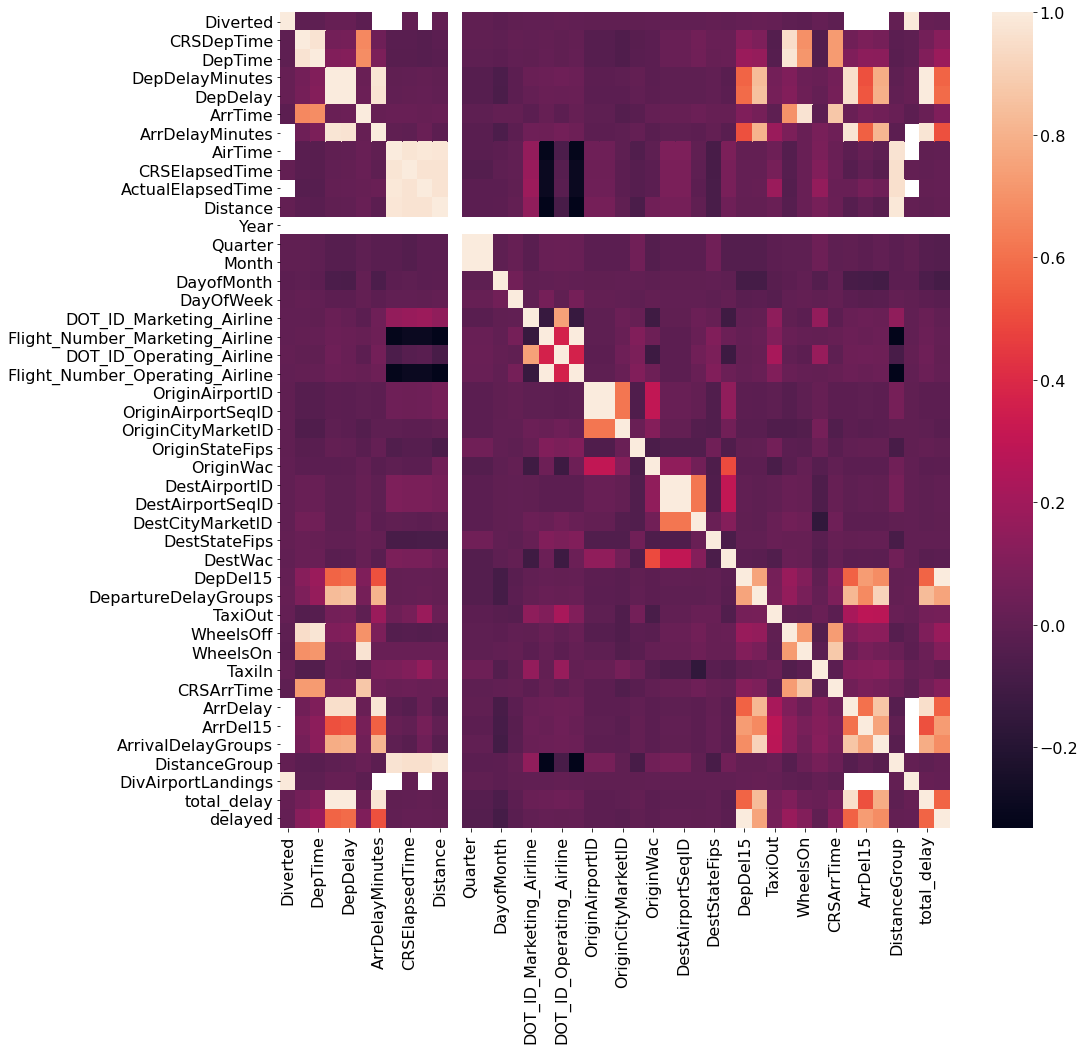

In [233]:
plt.figure(figsize=(15,15))
sns.heatmap(del_data.corr())

In [234]:
#df['delayed'] = df['Cancelled'].apply(int)
a = del_data['delayed'].value_counts()/len(df)

In [235]:
# Bar Graph of Cancelled flights
# Cancelled = 1

del_data['delayed'].value_counts().hvplot.bar(
    title="Delayed flights count", xlabel='Status Delayed', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (delayed)

In [236]:
print('Proportion of Flights delayed in the year 2018 :', a[1])

Proportion of Flights delayed in the year 2018 : 0.16302315046610877


In [237]:
delayed = del_data[del_data['delayed'] == 1]
delayed.head()

,FlightDate,Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,total_delay,delayed
5,28-01-2018,Endeavor Air Inc.,ABY,ATL,False,1202,1202.0,NaN,NaN,1326.0,22.0,37.0,62,84.0,145,2018,1,1,28,7,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8918B,3298,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,NaN,NaN,1200-1259,34.0,1236.0,1313.0,13.0,1304,22.0,1.0,1.0,1300-1359,1,0,NaN,1
9,03-01-2018,Endeavor Air Inc.,ATL,ABY,False,1037,1101.0,24.0,24.0,1159.0,22.0,32.0,60,58.0,145,2018,1,1,3,3,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N981EV,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,1.0,1.0,1000-1059,23.0,1124.0,1156.0,3.0,1137,22.0,1.0,1.0,1100-1159,1,0,24.0,1
14,08-01-2018,Endeavor Air Inc.,ATL,ABY,False,1037,1059.0,22.0,22.0,1153.0,16.0,32.0,60,54.0,145,2018,1,1,8,1,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8847A,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,1.0,1.0,1000-1059,18.0,1117.0,1149.0,4.0,1137,16.0,1.0,1.0,1100-1159,1,0,22.0,1
15,09-01-2018,Endeavor Air Inc.,ATL,ABY,False,1037,1222.0,105.0,105.0,1322.0,105.0,37.0,60,60.0,145,2018,1,1,9,2,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N304PQ,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,1.0,7.0,1000-1059,20.0,1242.0,1319.0,3.0,1137,105.0,1.0,7.0,1100-1159,1,0,105.0,1
24,18-01-2018,Endeavor Air Inc.,ATL,ABY,False,1037,1233.0,116.0,116.0,1345.0,128.0,32.0,60,72.0,145,2018,1,1,18,4,DL,DL_CODESHARE,19790,DL,3298,9E,20363,9E,N8970D,3298,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10146,1014602,30146,"Albany, GA",GA,13,Georgia,34,1.0,7.0,1000-1059,34.0,1307.0,1339.0,6.0,1137,128.0,1.0,8.0,1100-1159,1,0,116.0,1


[Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday'),
 Text(7, 0, 'Sunday')]

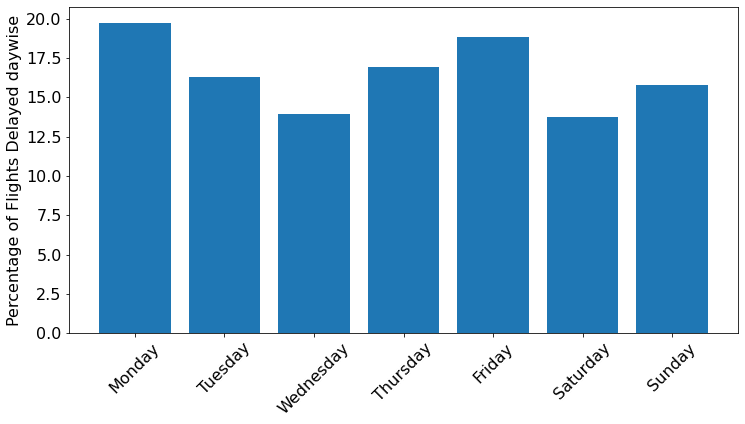

In [238]:
font = {'size'   : 16}
plt.rc('font', **font)

days_delayed = del_data[del_data['delayed'] == 1]['delayed'].groupby(del_data['DayOfWeek']).count()
days_total = del_data['delayed'].groupby(del_data['DayOfWeek']).count()
days_frac = np.divide(days_delayed, days_total)
x = days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_frac
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Delayed daywise')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

In [239]:
days_frac

DayOfWeek
1    0.197412
2    0.162701
3    0.139340
4    0.169311
5    0.188459
6    0.137563
7    0.157908
Name: delayed, dtype: float64

[Text(1, 0, 'January'), Text(10, 0, 'October')]

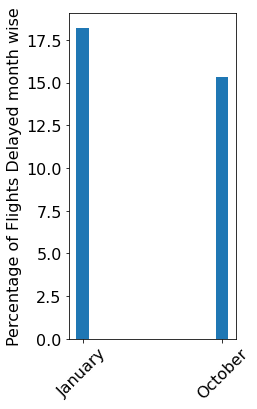

In [240]:
font = {'size'   : 16}
plt.rc('font', **font)

month_delayed = del_data[del_data['delayed'] == 1]['delayed'].groupby(del_data['Month']).count()
month_total = del_data['delayed'].groupby(del_data['Month']).count()
month_frac = np.divide(month_delayed, month_total)
x=month_frac.index.values
month = ['January', 'October']

fig, ax = plt.subplots(figsize = (3,6))
ax.bar(x,month_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Delayed month wise')
ax.set_xticks(x)
ax.set_xticklabels(month, rotation = 45)


In [241]:
month_total

Month
1     444998
10    586530
Name: delayed, dtype: int64

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31')]

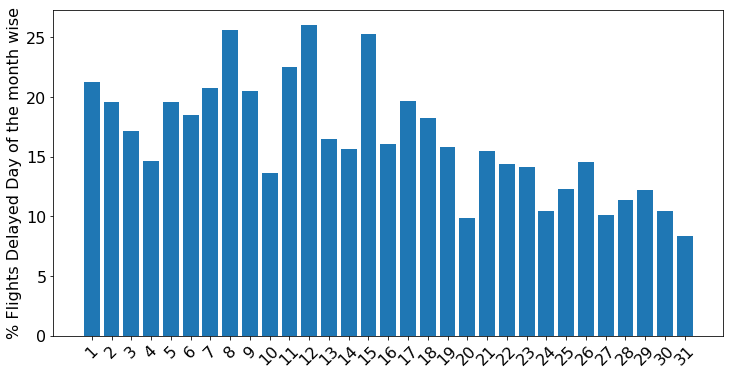

In [242]:
font = {'size'   : 16}
plt.rc('font', **font)

day_of_month_delayed = del_data[del_data['delayed'] == 1]['delayed'].groupby(del_data['DayofMonth']).count()
days_of_month_total = del_data['delayed'].groupby(del_data['DayofMonth']).count()
days_of_month_frac = np.divide(day_of_month_delayed, days_of_month_total)
x=days_of_month_frac.index.values
daywise = np.array(range(1,32,1))

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_of_month_frac*100, align='center')
ax.set_ylabel('% Flights Delayed Day of the month wise')
ax.set_xticks(x)
ax.set_xticklabels(daywise, rotation = 45)

In [247]:
days_of_month_frac.sort_values(ascending = False)

DayofMonth
12    0.260203
8     0.256172
15    0.252742
11    0.225097
1     0.213007
7     0.207354
9     0.204904
17    0.196872
2     0.196154
5     0.196084
6     0.184920
18    0.182333
3     0.171417
13    0.165057
16    0.160738
19    0.157916
14    0.156245
21    0.154551
4     0.146097
26    0.145683
22    0.143645
23    0.141391
10    0.136101
25    0.123213
29    0.121958
28    0.114136
24    0.104919
30    0.104315
27    0.101586
20    0.098499
31    0.083846
Name: delayed, dtype: float64

In [248]:
del_data.delayed.value_counts()

0    860586
1    170942
Name: delayed, dtype: int64

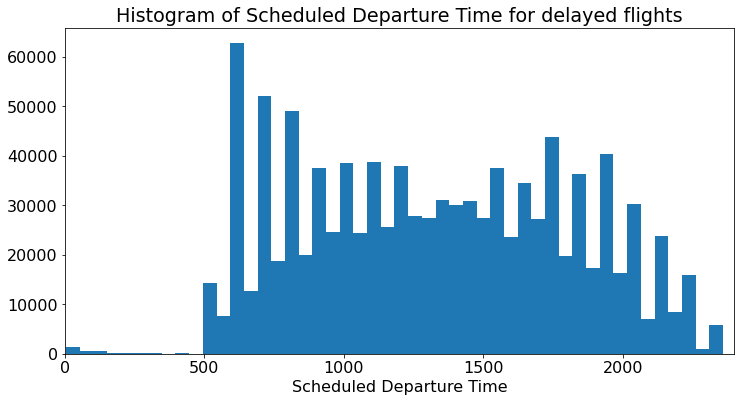

In [249]:
del_data['CRSDepTime'].head(10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))

ax.hist(del_data['CRSDepTime'], bins = 48)

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Histogram of Scheduled Departure Time for delayed flights')

plt.show()

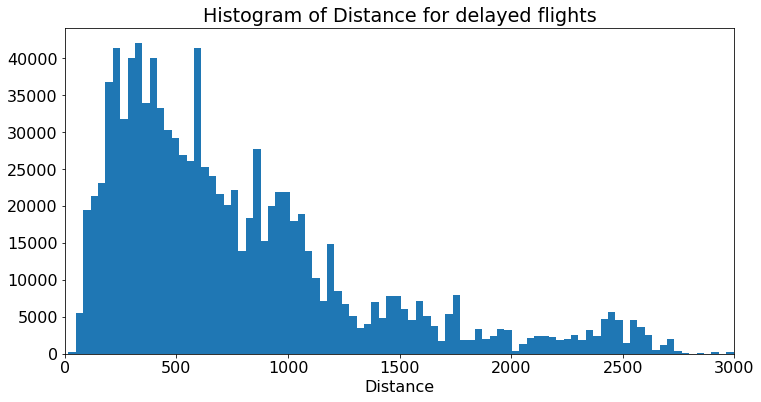

In [250]:
del_data['CRSDepTime'].head(10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))

ax.hist(del_data['Distance'], bins = 150)

ax.set_xlim(0,3000)

ax.set_xlabel('Distance')
ax.set_title('Histogram of Distance for delayed flights')

plt.show()

In [252]:
carrier_flights = del_data['Airline'].groupby(del_data['Airline']).count()
#carrier_cancelled = del_data['Cancelled'].groupby(del_data['Airline']).sum()
carrier_delayed = df_delayed['Airline'].groupby(df_delayed['Airline']).count()
carrier_diverted = del_data['Diverted'].groupby(del_data['Airline']).sum()
carrier_avg_time = del_data['AirTime'].groupby(del_data['Airline']).mean()
carrier_avg_dist = del_data['Distance'].groupby(del_data['Airline']).mean()
carrier_avg_delay = del_data['total_delay'].groupby(del_data['Airline']).mean()
carrier_avg_taxiIn = del_data['TaxiIn'].groupby(del_data['Airline']).mean()
carrier_avg_taxiOut = del_data['TaxiOut'].groupby(del_data['Airline']).mean()
#carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)
carrier_pct_delayed = 100*np.divide(carrier_delayed, carrier_flights)

summary_table_carrier = pd.concat([ carrier_flights, 
                                   carrier_diverted, 
                           carrier_avg_time, carrier_avg_dist, carrier_avg_delay,carrier_pct_delayed,
                          carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = [ 'Total Flights', 
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 'Percent Delayed',
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)' ]



summary_table_carrier

,Total Flights,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Percent Delayed,Average Taxi-In (minutes),Average Taxi-Out (minutes)
Airline,,,,,,,,
Air Wisconsin Airlines Corp,13702,34,60.148668,355.723982,13.099037,22.252226,8.163662,19.784630
Alaska Airlines Inc.,36624,104,168.621358,1281.197821,7.088221,24.672346,7.899440,18.861839
Allegiant Air,14327,38,119.738820,892.356041,13.856216,30.997417,6.511974,13.051023
American Airlines Inc.,64208,150,131.347388,970.057080,12.816596,34.484799,9.361967,18.585908
Cape Air,341,1,36.252941,117.272727,4.486804,13.196481,4.856305,8.123167
Capital Cargo International,6517,24,48.430310,248.767071,11.738990,25.655977,7.999078,19.712598
Comair Inc.,23530,69,65.390734,391.371951,9.660943,28.699533,8.375138,15.999363
"Commutair Aka Champlain Enterprises, Inc.",6691,12,62.155412,353.928561,22.781049,37.782095,8.062771,23.651920
Compass Airlines,12503,29,86.749399,585.415100,14.043750,26.201712,9.083747,19.120211


In [255]:
origin_flights = del_data['OriginStateName'].groupby(del_data['OriginStateName']).count()
#origin_cancelled = df['Cancelled'].groupby(df['OriginStateName']).sum()
origin_delayed = df_delayed['Airline'].groupby(df_delayed['OriginStateName']).count()
origin_diverted = del_data['Diverted'].groupby(del_data['OriginStateName']).sum()
origin_avg_time = del_data['AirTime'].groupby(del_data['OriginStateName']).mean()
origin_avg_dist = del_data['Distance'].groupby(del_data['OriginStateName']).mean()
origin_avg_delay = del_data['total_delay'].groupby(del_data['OriginStateName']).mean()
#origin_avg_taxiIn = df['TaxiIn'].groupby(df['Origin']).mean()
origin_avg_taxiOut = del_data['TaxiOut'].groupby(del_data['OriginStateName']).mean()
#origin_pct_cancelled = 100*np.divide(origin_cancelled, origin_flights)

summary_table_origin = pd.concat([origin_flights,  origin_diverted, 
                           origin_avg_time, origin_avg_dist, origin_avg_delay,
                           origin_avg_taxiOut], axis=1)

summary_table_origin.columns = ['Total Flights', 
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-Out (minutes)']

summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)
summary_table_origin.head(15)


,Total Flights,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
OriginStateName,,,,,,
California,121600,290,122.730476,947.840296,10.530099,16.686283
Texas,88790,196,105.619590,772.082735,13.126940,16.324316
Florida,74625,156,125.444091,915.984429,12.218687,14.701186
Illinois,62837,159,98.384058,691.970750,13.465443,20.241418
Georgia,62747,118,91.425841,631.372639,10.800479,15.917749
New York,53417,102,127.112951,850.190220,14.528789,22.986765
Colorado,44140,125,108.604544,824.460852,12.580562,16.956162
Virginia,37815,47,98.052214,636.604892,13.028726,18.695782
North Carolina,35496,66,82.537765,534.360660,11.572125,19.282708


In [266]:
del_data['Airline'].groupby(del_data['OriginStateName']).count()/len(del_data)*100


OriginStateName
Alabama                                            0.501101
Alaska                                             0.604346
Arizona                                            2.223982
Arkansas                                           0.355686
California                                        11.788337
Colorado                                           4.279089
Connecticut                                        0.397759
Florida                                            7.234413
Georgia                                            6.082918
Hawaii                                             1.579889
Idaho                                              0.464941
Illinois                                           6.091643
Indiana                                            0.900703
Iowa                                               0.333971
Kansas                                             0.180218
Kentucky                                           1.171175
Louisiana               

In [267]:
del_data.shape

(1031528, 62)

In [268]:
carrier_flights = del_data['Airline'].groupby(del_data['Airline']).count()
carrier_flights

Airline
Air Wisconsin Airlines Corp                   13702
Alaska Airlines Inc.                          36624
Allegiant Air                                 14327
American Airlines Inc.                        64208
Cape Air                                        341
Capital Cargo International                    6517
Comair Inc.                                   23530
Commutair Aka Champlain Enterprises, Inc.      6691
Compass Airlines                              12503
Delta Air Lines Inc.                         151775
Empire Airlines Inc.                            886
Endeavor Air Inc.                             30615
Envoy Air                                     25726
ExpressJet Airlines Inc.                      28423
Frontier Airlines Inc.                        19852
GoJet Airlines, LLC d/b/a United Express      14665
Hawaiian Airlines Inc.                        12236
Horizon Air                                   17638
JetBlue Airways                               48181
Mesa

In [269]:
del_data['Airline'].groupby(del_data['Airline']).count()

Airline
Air Wisconsin Airlines Corp                   13702
Alaska Airlines Inc.                          36624
Allegiant Air                                 14327
American Airlines Inc.                        64208
Cape Air                                        341
Capital Cargo International                    6517
Comair Inc.                                   23530
Commutair Aka Champlain Enterprises, Inc.      6691
Compass Airlines                              12503
Delta Air Lines Inc.                         151775
Empire Airlines Inc.                            886
Endeavor Air Inc.                             30615
Envoy Air                                     25726
ExpressJet Airlines Inc.                      28423
Frontier Airlines Inc.                        19852
GoJet Airlines, LLC d/b/a United Express      14665
Hawaiian Airlines Inc.                        12236
Horizon Air                                   17638
JetBlue Airways                               48181
Mesa

## Vidya

- Year, Month, DayofMonth, DayOfWeek: dates of the flight

- UniqueCarrier: An identification number assigned by US DOT to identify a unique airline

- Origin and Dest: code attributed by IATA to identify the airports

- CRSDepTime and CRSArrTime : scheduled times of take-off and landing

- DepTime and ArrTime: real times at which take-off and landing took place

- DepDelay and ArrDelay: difference (in minutes) between planned and real times

- Distance: distance (in miles)

In [87]:
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import datetime

In [88]:
dff = df['Airline'].value_counts()[:10]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Origin Airlines Distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [89]:
### Origin city dist

In [90]:
dff = df.OriginCityName.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Origin City Distribution', 
    yaxis = dict(title = '# of Flights')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [31]:
## No of flights monthly

dff = df.Month.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
         6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='# of Flights (monthly)', 
    yaxis = dict(title = '# of Flights'
                                                )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [32]:
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dff = df.DayOfWeek.value_counts()
dff = dff.to_frame().sort_index()
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.DayOfWeek,
    name = 'Weather',
    marker=dict(
        color = dff.DayOfWeek,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(
    title='# of Flights (Day of Week)', 
    yaxis = dict(title = '# of Flights'
                                                    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [270]:
df['dep_delay'] = np.where(df.DepDelay>0,1,0)
df['arr_delay'] = np.where(df.ArrDelay>0,1,0)
dff = df.groupby('Month').dep_delay.mean().round(2)

dff.index = dff.index.map(month)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure_delay',
    marker = dict(
        color = 'aqua'
    )
)

dff = df.groupby('Month').arr_delay.mean().round(2)
dff.index = dff.index.map(month)

trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Months)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

TypeError: 'list' object is not callable

In [394]:
dff = df.groupby('DayOfWeek').DepDelay.mean().round(2)
dff.index = dff.index.map(dayOfWeek)

trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure_delay',
    marker=dict(
        color = 'cyan'
    )
)

dff = df.groupby('DayOfWeek').ArrDelay.mean().round(2)
dff.index = dff.index.map(dayOfWeek)

trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival_delay',
    marker=dict(
        color = 'indigo'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Day of Week)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

NameError: name 'dayOfWeek' is not defined

In [35]:
import seaborn as sns


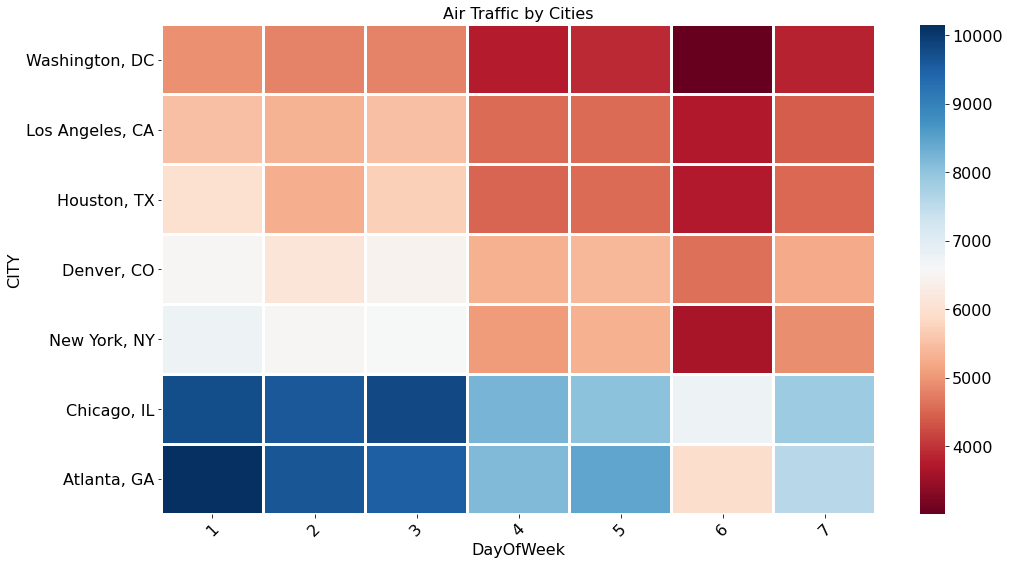

In [272]:
flight_volume = del_data.pivot_table(index="OriginCityName",columns="DayOfWeek",
                               values="DayofMonth",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by=1, ascending=False)[:7]
fv = fv.iloc[::-1]

fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='RdBu',linecolor="w", linewidths=2)

plt.title('Air Traffic by Cities',size=16)
plt.ylabel('CITY')
plt.xticks(rotation=45)
plt.show()


### AIRLINES COMPARISON

#### Arrival & Departure Delay

In [393]:
dff = df.groupby('Airline').DepDelay.mean().to_frame().sort_values(by='DepDelay',
                                                    ascending=False).round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.DepDelay,
    name='departure_delay',
    marker=dict(
        color = 'navy'
    )
)

dff = df.groupby('Airline').ArrDelay.mean().to_frame().sort_values(by='ArrDelay',
                                                    ascending=False).round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.ArrDelay,
    name='arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1, trace2]
layout = go.Layout(xaxis=dict(tickangle=15), title='Mean Arrival & Departure Delay by Airlines',
    yaxis = dict(title = 'minute'), 
                   barmode='stack')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [38]:
df['DEP_ARR_DIFF'] = df['DepDelay'] - df['ArrDelay']
dff = df.groupby('Airline').DEP_ARR_DIFF.mean().to_frame().sort_values(by='DEP_ARR_DIFF',
                                                    ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.DEP_ARR_DIFF,
    marker=dict(
        color = dff.DEP_ARR_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Mean (Departure Delay - Arrival Delay) by Airlines', 
                   yaxis = dict(title = 'minute')
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Taxi in and Taxi Out

- taxi_out = wheels_off - departure_time
- taxi_in = arrival_time - wheels_on

In [277]:
dff = del_data.groupby('Airline').TaxiOut.mean().to_frame().sort_values(by='TaxiOut',
                                                    ascending=False)[:8].round(2)

trace1 = go.Bar(
    x=dff.index,
    y=dff.TaxiOut,name='TAXI_OUT',
    marker=dict(
        color = 'aqua'
    )
)

dff = del_data.groupby('Airline').TaxiIn.mean().to_frame().sort_values(by='TaxiIn',
                                                        ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.TaxiIn, name='TAXI_IN',
    marker=dict(
       color = 'indigo'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Median Taxi Out', 'Median Taxi In'))

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850, 
                     title='Which is hard wheel-off or wheel-on?',  
                     showlegend=False)               
py.iplot(fig)

In [278]:
dff = del_data[del_data['delayed'] == 1].groupby('Airline').TaxiOut.mean().to_frame().sort_values(by='TaxiOut',
                                                    ascending=False)[:8].round(2)

trace1 = go.Bar(
    x=dff.index,
    y=dff.TaxiOut,name='TAXI_OUT',
    marker=dict(
        color = 'aqua'
    )
)

dff = del_data[del_data['delayed'] == 1].groupby('Airline').TaxiIn.mean().to_frame().sort_values(by='TaxiIn',
                                                        ascending=False)[:8].round(2)

trace2 = go.Bar(
    x=dff.index,
    y=dff.TaxiIn, name='TAXI_IN',
    marker=dict(
       color = 'indigo'
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Median Taxi Out', 'Median Taxi In'))

fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(yaxis = dict(title = 'minute'), height=500, width=850, 
                     title='Which is hard wheel-off or wheel-on?',  
                     showlegend=False)               
py.iplot(fig)

C:\Users\P\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [275]:
del_data['OUT_IN_DIFF'] = del_data['TaxiOut'] - del_data['TaxiIn']
dff = del_data.groupby('Airline').OUT_IN_DIFF.mean().to_frame().sort_values(by='OUT_IN_DIFF',
                                                    ascending=False).round(2)

trace = go.Bar(
    x=dff.index,
    y=dff.OUT_IN_DIFF,
    marker=dict(
        color = dff.OUT_IN_DIFF,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=15),
    title='Mean (Taxi Out - Taxi In) by Airlines', 
                   yaxis = dict(title = 'minute'
                                                               )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Speed

In [41]:
df['SPEED'] = 60*df['Distance']/df['AirTime']
dff = df.groupby('Airline').SPEED.mean().to_frame().sort_values(by='SPEED',
                                                    ascending=False).round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.SPEED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.SPEED.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Mean Speed by Airlines', 
                   yaxis = dict(title = 'Speed')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Delayed Rates

In [283]:
dff = del_data.groupby('Airline')[['delayed']].mean().sort_values(by='delayed', 
                                                    ascending=False).round(3)

trace1 = go.Scatter(
    x=dff.index,
    y=dff.delayed,
    mode='markers',
    marker=dict(
        symbol = 'star-square',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.delayed,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Delay Rate by Airlines', yaxis = dict(title = 'Delayed Rate'
                                                       )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

dff = df.groupby('OriginCityName')[['delayed']].mean().sort_values(by='delayed', 
                                            ascending=False)[:10].round(3)
trace2 = go.Scatter(
    x=dff.index,
    y=dff.delayed,
    mode='markers',
    marker=dict(symbol = 'diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.delayed,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Delay Rate by Cities', 
                   yaxis = dict(title = 'delayed Rate'
                                                     )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Delay Reasons

In [284]:
correlation = df[['DayOfWeek','Month','ActualElapsedTime', 'AirTime', 'Distance',
       'TaxiIn', 'CRSArrTime', 'ArrTime',
       'ArrDelay']].fillna(0).corr()
cols = correlation.columns.values
corr  = correlation.values

trace = go.Heatmap(z = corr,
                   x = cols,
                   y = cols,
                   colorscale = "YlOrRd",reversescale = True
                                    ) 

data = [trace]
layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 600,
                        width   = 800,
                        margin  = dict(l = 200
                                      ),
                        yaxis   = dict(tickfont = dict(size = 8)),
                        xaxis   = dict(tickfont = dict(size = 8))
                       )
                  )

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [287]:
del_data.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Diverted', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes',
       'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOf

In [291]:
del_data[del_data['delayed'] == 1]['Diverted'].value_counts()

False    170267
True        675
Name: Diverted, dtype: int64

In [321]:
del_data['diverted'] = del_data['Diverted'].apply(lambda x: 0 if x == False else 1)

In [325]:
del_data.drop('Diverted', axis = 1, inplace = True)
#del_data.head()

In [326]:
X = del_data[['Airline', 'Origin', 'Dest', 'CRSDepTime',
       'DepDelayMinutes', 'ArrDelayMinutes',
       'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 
       'DayofMonth', 'DayOfWeek',
       'Operating_Airline',
       'OriginAirportID',
       'OriginCityName',
       'OriginStateName',
       'DestCityName',
       'DestStateName',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 
       'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings','OUT_IN_DIFF','diverted']]
y = del_data['delayed']

In [320]:
m_col = ['Airline', 'Origin', 'Dest', 'Diverted', 
       'Operating_Airline', 'OriginAirportID', 'OriginCityName',
       'OriginStateName', 'DestCityName', 'DestStateName', 'DepTimeBlk',
       'ArrTimeBlk']

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [328]:
y_train.value_counts()

0    602398
1    119671
Name: delayed, dtype: int64

In [294]:
#pip install prince

In [295]:
import prince

In [315]:
%%time
mca = prince.MCA()
mca = mca.fit(X_train[m_col]) # same as calling ca.fs_r(1)
mca = mca.transform(X_train[m_col]) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)

MemoryError: Unable to allocate 8.79 GiB for an array with shape (1634, 722069) and data type int64

In [330]:
X_train.head(1)

,Airline,Origin,Dest,CRSDepTime,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,DayofMonth,DayOfWeek,Operating_Airline,OriginAirportID,OriginCityName,OriginStateName,DestCityName,DestStateName,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTimeBlk,DistanceGroup,DivAirportLandings,OUT_IN_DIFF,diverted
169819,SkyWest Airlines Inc.,MSP,BJI,1125,3.0,0.0,46.0,82,71.0,199,10,3,OO,13487,"Minneapolis, MN",Minnesota,"Bemidji, MN",Minnesota,1100-1159,20.0,1148.0,1234.0,5.0,1247,1200-1259,1,0,15.0,0


In [350]:
X = del_data[['CRSDepTime',
       'DepDelayMinutes', 'ArrDelayMinutes',
       'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 
       'DayofMonth', 'DayOfWeek',
       'OriginAirportID',
       'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 
       'DistanceGroup',
       'DivAirportLandings','OUT_IN_DIFF','diverted']]
y = del_data['delayed']

In [320]:
m_col = ['Airline', 'Origin', 'Dest', 'Diverted', 
       'Operating_Airline', 'OriginAirportID', 'OriginCityName',
       'OriginStateName', 'DestCityName', 'DestStateName', 'DepTimeBlk',
       'ArrTimeBlk']

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

ValueError: Found input variables with inconsistent numbers of samples: [1027677, 1031528]

In [340]:
y_train.value_counts()

0    602446
1    119623
Name: delayed, dtype: int64

In [355]:
bigX = pd.concat([X,y], axis = 1)

In [356]:
bigX

,CRSDepTime,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,DayofMonth,DayOfWeek,OriginAirportID,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,DistanceGroup,DivAirportLandings,OUT_IN_DIFF,diverted,delayed
0,1202,0.0,0.0,38.0,62,59.0,145,23,2,10146,14.0,1211.0,1249.0,7.0,1304,1,0,7.0,0,0
1,1202,0.0,0.0,36.0,62,61.0,145,24,3,10146,13.0,1210.0,1246.0,12.0,1304,1,0,1.0,0,0
2,1202,0.0,0.0,40.0,62,69.0,145,25,4,10146,18.0,1211.0,1251.0,11.0,1304,1,0,7.0,0,0
3,1202,0.0,0.0,35.0,62,63.0,145,26,5,10146,17.0,1207.0,1242.0,11.0,1304,1,0,6.0,0,0
4,1400,0.0,0.0,36.0,60,64.0,145,27,6,10146,17.0,1412.0,1448.0,11.0,1500,1,0,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1330,1.0,0.0,288.0,328,325.0,2338,6,6,14771,31.0,1402.0,1550.0,6.0,1558,10,0,25.0,0,0
1048571,1221,0.0,6.0,153.0,173,186.0,1065,6,6,11697,27.0,1241.0,1514.0,6.0,1514,5,0,21.0,0,0
1048572,1352,0.0,0.0,66.0,86,90.0,455,6,6,10620,18.0,1349.0,1455.0,6.0,1518,2,0,12.0,0,0
1048573,1135,0.0,0.0,292.0,332,327.0,2565,6,6,14771,25.0,1156.0,1948.0,10.0,2007,11,0,15.0,0,0


In [362]:
X = bigX.iloc[:,0:-1]

In [368]:
y = bigX[['delayed']]

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [372]:
%%time
from sklearn.naive_bayes import GaussianNB
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Wall time: 634 ms


In [373]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[247744,   9609],
       [     6,  50945]], dtype=int64)

In [374]:
tp = con_mat[1][1]
fp = con_mat[0][1]
tn = con_mat[0][0]
fn = con_mat[1][0]

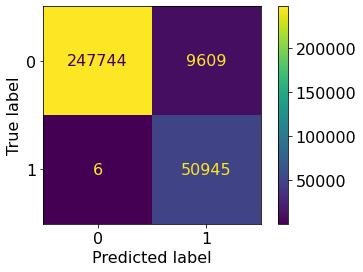

In [376]:
ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = gnb.classes_ ).plot()
plt.show()

In [377]:
precision = tp/(tp+fp) # of all the predicted positives how many are correct
recall = tp/(tp+fn) # of all the actual positives, how many are correctly classified
# our label is delayed == 1, on_time == 0
# so we cannot have a delayed flight labelled as on_time,
# more important to identify lesser false positives
print('recall : ',recall)
print('precision : ',precision)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

recall :  0.9998822397990226
precision :  0.8413151897479936
Accuracy of logistic regression classifier on test set: 0.97


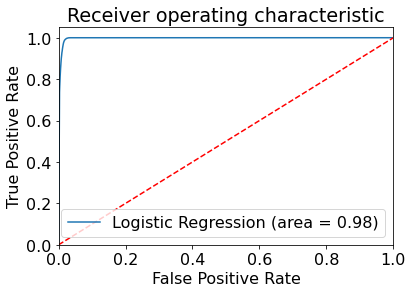

In [378]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [379]:
bigX.head(1)

,CRSDepTime,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,DayofMonth,DayOfWeek,OriginAirportID,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,DistanceGroup,DivAirportLandings,OUT_IN_DIFF,diverted,delayed
0,1202,0.0,0.0,38.0,62,59.0,145,23,2,10146,14.0,1211.0,1249.0,7.0,1304,1,0,7.0,0,0


In [384]:
X = bigX[['CRSDepTime', 
       'CRSElapsedTime', 'Distance', 'DayofMonth',
       'DayOfWeek', 'OriginAirportID', 'CRSArrTime', 'DistanceGroup', 'diverted']]

In [385]:
y = bigX[['delayed']]

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [387]:
%%time
from sklearn.naive_bayes import GaussianNB
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

Wall time: 362 ms


In [388]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[257353,      0],
       [ 50951,      0]], dtype=int64)

In [389]:
tp = con_mat[1][1]
fp = con_mat[0][1]
tn = con_mat[0][0]
fn = con_mat[1][0]

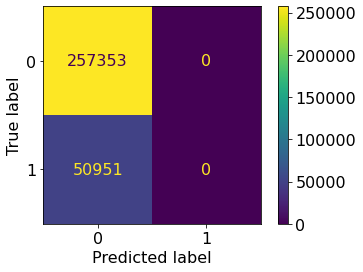

In [390]:
ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = gnb.classes_ ).plot()
plt.show()

In [391]:
precision = tp/(tp+fp) # of all the predicted positives how many are correct
recall = tp/(tp+fn) # of all the actual positives, how many are correctly classified
# our label is delayed == 1, on_time == 0
# so we cannot have a delayed flight labelled as on_time,
# more important to identify lesser false positives
print('recall : ',recall)
print('precision : ',precision)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

recall :  0.0
precision :  nan
Accuracy of logistic regression classifier on test set: 0.83


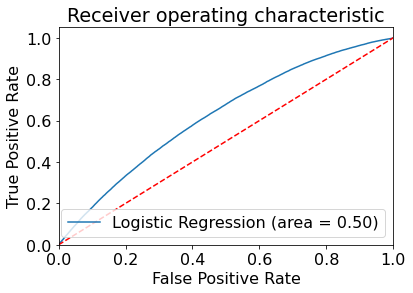

In [392]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()